In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#drop customer id not useful for prediction
df.drop('customerID', axis=1, inplace=True)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.dropna(inplace=True)

In [19]:
# Encode binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
# Only apply get_dummies to relevant categorical columns
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [27]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [29]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.02,random_state=42)

In [35]:
# Define your feature names manually, same as in Streamlit
feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No',
                 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                 'TechSupport_No internet service', 'TechSupport_Yes',
                 'StreamingTV_No internet service', 'StreamingTV_Yes',
                 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                 'Contract_One year', 'Contract_Two year',
                 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                 'PaymentMethod_Mailed check']

# Convert x_train and x_test to DataFrames with labeled columns
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

In [37]:
print(type(x_train))
print(x_train.columns.tolist())  # this should NOT throw an error

<class 'pandas.core.frame.DataFrame'>
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [39]:
# Calculate class counts
#num_churn = y.sum()  # churn = 1
#num_non_churn = len(y) - num_churn

# Calculate scale_pos_weight
#scale_pos_weight = num_non_churn / num_churn
#print("scale_pos_weight =", scale_pos_weight)


In [41]:
# Step 1: Compute the weight
from xgboost import XGBClassifier

weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Step 2: Use it in the model
xgb_model = XGBClassifier(
    scale_pos_weight=weight,
    eval_metric='logloss'
)

xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [43]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 2, 3]  # Optional if you're tuning it
}

rsearch = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=30,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rsearch.fit(x_train, y_train)
best_xgb = rsearch.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [45]:
# Define stacked model with XGBoost, Logistic Regression as final
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import  StackingClassifier
stack_model = StackingClassifier(
    estimators=[('xgb', best_xgb)],
    final_estimator=LogisticRegression(max_iter=1000)
)

In [47]:
stack_model.fit(x_train, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [49]:
#XG Boost classifier
#import xgboost as xgb
#from xgboost import XGBClassifier, plot_importance
#xgc = XGBClassifier()
#xgc.fit(x_train, y_train)

In [51]:
import joblib
joblib.dump(best_xgb, "xgb_churnn1_model.pkl")

['xgb_churnn1_model.pkl']

In [53]:
# Predictions
y_pred = stack_model.predict(x_test)
y_prob = stack_model.predict_proba(x_test)[:, 1]

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , accuracy_score 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

Confusion Matrix:
 [[92  5]
 [22 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87        97
           1       0.81      0.50      0.62        44

    accuracy                           0.81       141
   macro avg       0.81      0.72      0.75       141
weighted avg       0.81      0.81      0.79       141


ROC-AUC Score: 0.8894095595126523
Accuracy: 80.85 %


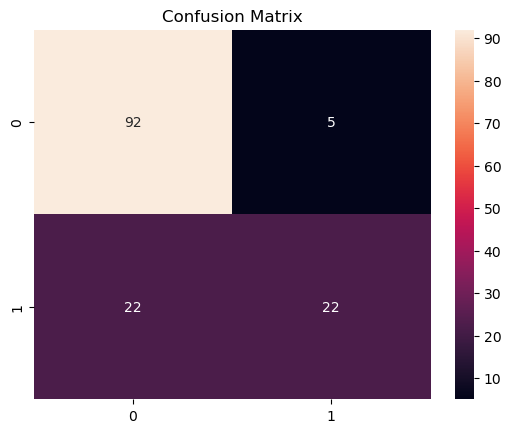

In [57]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'Confusion Matrix')
plt.show()

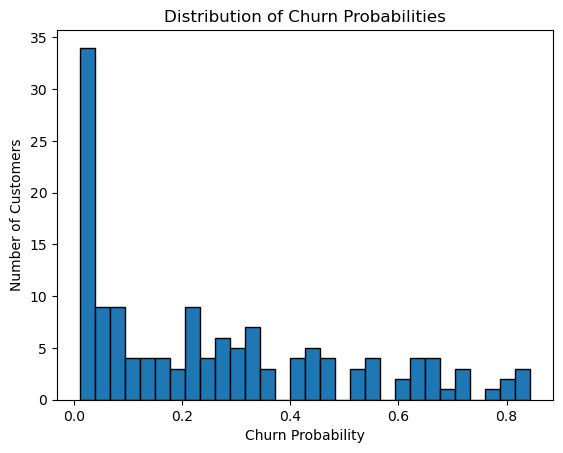

In [58]:
import matplotlib.pyplot as plt

y_proba = best_xgb.predict_proba(x_test)[:, 1]  # Probabilities of churn

plt.hist(y_proba, bins=30, edgecolor='black')
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

In [61]:
from sklearn.metrics import f1_score
import numpy as np

y_probs = best_xgb.predict_proba(x_test)[:, 1]

thresholds = np.arange(0.2, 0.6, 0.01)
scores = [f1_score(y_test, y_probs > t) for t in thresholds]

best_t = thresholds[np.argmax(scores)]
print(f"Best threshold for F1 score: {best_t:.2f}")


Best threshold for F1 score: 0.37


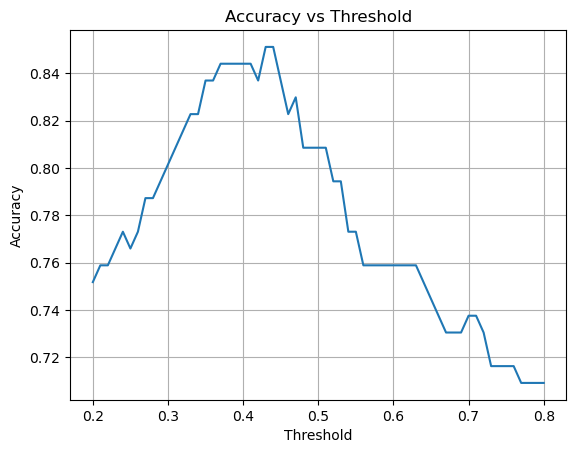

In [63]:
from sklearn.metrics import accuracy_score

thresholds = np.arange(0.2, 0.8, 0.01)
accuracies = [accuracy_score(y_test, y_probs > t) for t in thresholds]

import matplotlib.pyplot as plt
plt.plot(thresholds, accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Threshold")
plt.grid()
plt.show()


In [65]:
print(best_xgb.feature_names_in_)

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'PaperlessBilling' 'MonthlyCharges' 'TotalCharges'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


In [67]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.95      0.87        97\n           1       0.81      0.50      0.62        44\n\n    accuracy                           0.81       141\n   macro avg       0.81      0.72      0.75       141\nweighted avg       0.81      0.81      0.79       141\n'

In [69]:
print(x_train.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import joblib
import numpy as np

# Data split (make sure X and y are defined earlier)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handle imbalance
weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train the model
best_xgb = XGBClassifier(scale_pos_weight=weight, eval_metric='logloss', random_state=42)
best_xgb.fit(x_train, y_train)

# Threshold tuning
y_probs = best_xgb.predict_proba(x_test)[:, 1]
thresholds = np.arange(0.2, 0.6, 0.01)
f1_scores = [f1_score(y_test, y_probs > t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"✅ Best F1 threshold: {best_threshold:.2f}")

# Save the final model
joblib.dump(best_xgb, "xgb_churn_FINAL.pkl")  # ✅ This file is used by the app


✅ Best F1 threshold: 0.45


['xgb_churn_FINAL.pkl']